In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 處理資料

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[123]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  39, 135, 110,
         66,  66,  92, 159,  92,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  17,  67,  92,  93,  76,  88, 170,
        192, 180, 194, 143,  65,  83,  91,  60,  11,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  20, 101,  83,  69,  58,  65,  50,  28,
         33,  38,  24,  22,  46,  52,  58,  78,  93,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  82,  81,  55,  66,  64,  62,  66,  64,
         57,  53,  55,  61,  55,  55,  54,  49,  60,  60,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  10, 101,  75,  67,  61,  63,  67,  64,  63,
         55,  49,  36,  40,  52,  54,  53,  53,  55,  77,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  32, 118,  90,  64,  65,  65,  64,  60,  50,
         27,  56, 101,  31,  36,  49,  54,  48,  68,  83,  23,   0,   0,
          0,   0],
       [  

In [6]:
x_train=x_train.reshape(60000,28,28,1)/255

In [7]:
x_test=x_test.reshape(10000,28,28,1)/255

In [8]:
x_train[123].shape,y_train[123]

((28, 28, 1), 2)

In [9]:
from tensorflow.keras.utils import to_categorical #載入模組

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) #onehotencoder

### 打造函數學習機CNN(用6個36個216個4*4的filter去打造，本來想改activation=sigmoid結果資料正確率會太低，又跑好久就換回來了)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(6,(4,4),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#第一層
model.add(Conv2D(36,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#第二層
model.add(Conv2D(216,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#第三層

In [14]:
model.add(Flatten())#拉平

In [15]:
model.add(Dense(33, activation='relu'))#全連結隱藏層

In [16]:
model.add(Dense(10, activation='softmax'))#輸出結果

### 看一下長甚麼樣子(lr用0.99)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         102       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        3492      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 216)         124632    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 216)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1944)              0

In [18]:
model.compile(loss='mse', optimizer=SGD(lr=0.99),metrics=['accuracy'])

### 訓練 (每60次調整一次，跑7次)

In [19]:
model.fit(x_train, y_train, batch_size=60, epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0454 - accuracy: 0.6507
Epoch 2/7
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0224 - accuracy: 0.8432
Epoch 3/7
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0184 - accuracy: 0.8733
Epoch 4/7
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.0166 - accuracy: 0.8871
Epoch 5/7
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0152 - accuracy: 0.8971
Epoch 6/7
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0142 - accuracy: 0.9034
Epoch 7/7
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0134 - accuracy: 0.9100


### 預測

In [20]:
result = model.predict_classes(x_test)

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
def myprediction(n):
    print("CNN預測為",class_names[result[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap="red")

CNN預測是 Dress


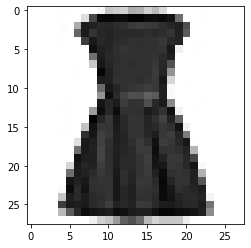

In [23]:
pred(7865)

In [24]:
from ipywidgets import interact_manual

In [25]:
interact_manual(myprediction, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.pred(n)>

In [26]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 378us/sample - loss: 0.0162 - accuracy: 0.8905


In [27]:
loss, acc = score

In [28]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8905


### 存放model

In [ ]:
model.save('myCNNmodel.h5')